In [ ]:
import matplotlib.pyplot as plt
import numpy as np


ts = [
    3.46,  4.58,  5.67,  6.64,  7.63,  8.41,  9.32, 10.27, 11.19,
    12.39, 13.42, 15.19, 16.24, 17.23, 18.18, 19.29, 21.23, 21.99,
    24.33, 25.58, 26.43, 27.44, 28.43, 30.49, 31.34, 32.34, 33.00,
    35.20, 36.34, 37.29, 38.50, 39.67, 41.37, 42.58, 45.39, 46.38,
    48.29, 49.24, 50.19, 51.14, 52.10, 54.00, 56.33, 57.33, 59.38,
]
Vs = [
    0.0158, 0.0264, 0.0326, 0.0445, 0.0646, 0.0933, 0.1454, 0.2183, 0.2842,
    0.4977, 0.6033, 0.8441, 1.2163, 1.4470, 2.3298, 2.5342, 3.0064, 3.4044,
    3.2046, 4.5241, 4.3459, 5.1374, 5.5376, 4.8946, 5.0660, 6.1494, 6.8548,
    5.9668, 6.6945, 6.6395, 6.8971, 7.2966, 7.2268, 6.8815, 8.0993, 7.2112,
    7.0694, 7.4971, 6.9974, 6.7219, 7.0523, 7.1095, 7.0694, 8.0562, 7.2268, 
]
#pd.DataFrame({'$t$': ts, '$V$': Vs}).T




In [ ]:
dt = np.diff(ts)
dV = np.diff(Vs)
dV_dt = dV / dt

#midpoint
ts_mid = (np.array(ts[:-1]) + np.array(ts[1:])) / 2

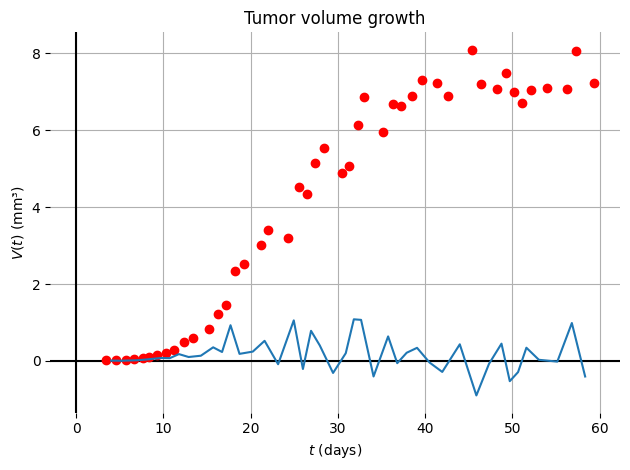

In [14]:
plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.plot(ts, Vs, 'or')
plt.title('Tumor volume growth'); plt.xlabel('$t$ (days)'); plt.ylabel('$V(t)$ (mm³)')
plt.grid(True); plt.box(False)


plt.plot(ts_mid, dV_dt)

plt.box(False)
plt.tight_layout()
plt.show()

K: 7.48
r: 0.1264
t0: 20.65


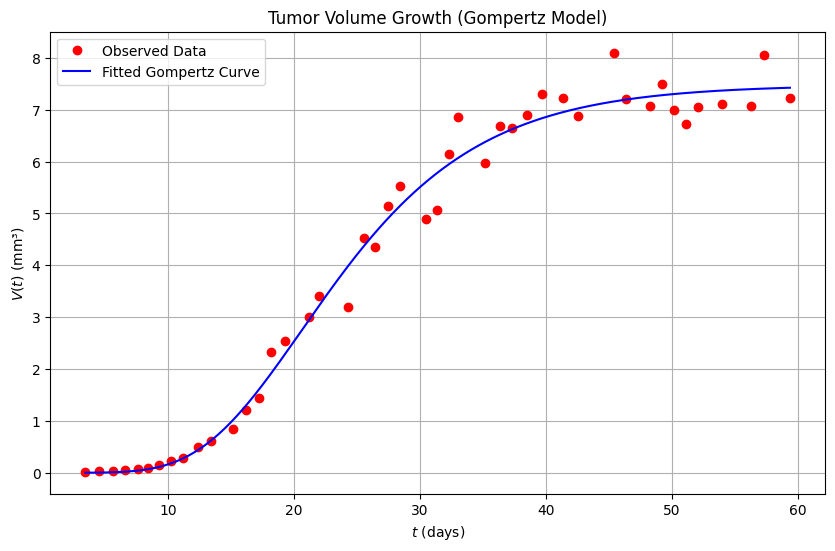

In [ ]:
from scipy.optimize import curve_fit

def gompertz_model(t, K, r, t0):
    return K * np.exp(-np.exp(-r * (t - t0))) #e^x


initial_guess = [max(Vs), 0.1, ts[np.argmax(np.gradient(Vs))]]
params, covariance = curve_fit(gompertz_model, ts, Vs, p0=initial_guess)



K_fit, r_fit, t0_fit = params
print(f"K: {K_fit:.2f}\nr: {r_fit:.4f}\nt0: {t0_fit:.2f}")

ts_fine = np.linspace(min(ts), max(ts), 500) #create between-values in given range
Vs_fitted = gompertz_model(ts_fine, K_fit, r_fit, t0_fit)

plt.figure(figsize=(10, 6))
plt.plot(ts, Vs, 'ro', label='Observed Data')
plt.plot(ts_fine, Vs_fitted, '-b', label='Fitted Gompertz Curve')
plt.title('Tumor Volume Growth (Gompertz Model)')
plt.xlabel('$t$ (days)')
plt.ylabel('$V(t)$ (mm³)')
plt.legend()
plt.grid(True)
plt.show()


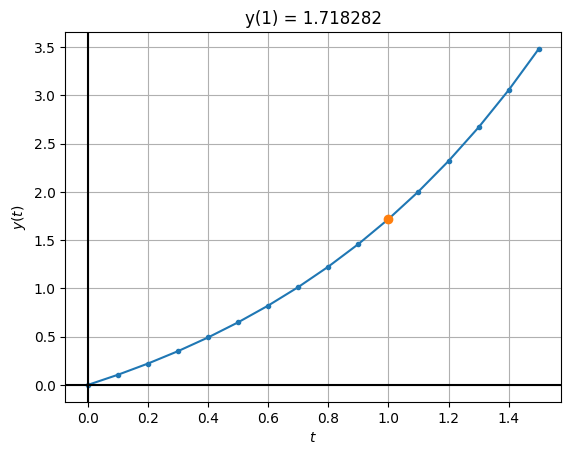

In [ ]:
from math import exp
from matplotlib import pyplot as plt


def solve_exact(t):
    """Lost de differentiaalvergelijking
        dy/dt = y + 1
    met beginconditie y(0) = 0 exact op, en retourneert de waarde
    y(t) voor een gevraagde t.
    """
    return exp(t) - 1.0 #e^t -1

ts = [i / 10 for i in range(16)]
ys = [solve_exact(t) for t in ts]

plt.plot(ts, ys, '.-')
plt.plot(1.0, solve_exact(1.0), 'o')
plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.grid(True)
plt.xlabel('$t$'); plt.ylabel('$y(t)$')
plt.title(f'y(1) = {solve_exact(1.0):8.6f}')
plt.show()



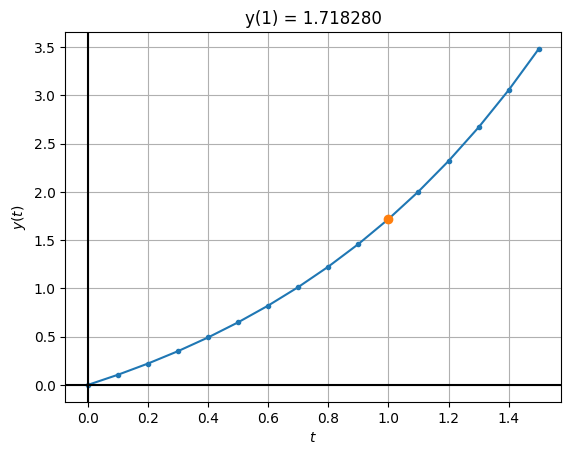

In [ ]:
def solve_rungekutta(t, steps=10):
    """Lost de differentiaalvergelijking
        dy/dt = y + 1
    met beginconditie y(0) = 0 op met Runge-Kutta's methode,
    en retourneert de waarde y(t) voor een gevraagde t.
    """
    y = 0.0                             # Beginconditie
    dt = t / steps
    for step in range(steps):
        # Tijdelijke stappen:
        dydt1 = y + 1.0                 # Differentiaalvergelijking stap 1
        y1 = y + dydt1 * 0.5 * dt
        dydt2 = y1 + 1.0                # Differentiaalvergelijking stap 2
        y2 = y + dydt2 * 0.5 * dt
        dydt3 = y2 + 1.0                # Differentiaalvergelijking stap 3
        y3 = y + dydt3 * dt
        dydt4 = y3 + 1.0                # Differentiaalvergelijking stap 4
        # Definitieve stap:
        dydt = (dydt1 + 2.0 * dydt2 + 2.0 * dydt3 + dydt4) / 6.0
        y += dydt * dt
    return y

ts = [i / 10 for i in range(16)]
ys = [solve_rungekutta(t) for t in ts]

plt.plot(ts, ys, '.-')
plt.plot(1.0, solve_rungekutta(1.0), 'o')
plt.axhline(0.0, color='k'); plt.axvline(0.0, color='k')
plt.grid(True)
plt.xlabel('$t$'); plt.ylabel('$y(t)$')
plt.title(f'y(1) = {solve_rungekutta(1.0):8.6f}')
plt.show()

